# Make a sub cube of a large ASKAP cube
### also make some moment maps of the subcube

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.coordinates import SkyCoord, EarthLocation
from astropy.io import fits
from spectral_cube import SpectralCube
from spectral_cube import BooleanArrayMask
from astropy.convolution import Gaussian1DKernel, convolve
import aplpy  
from astropy.wcs import WCS
from reproject import reproject_interp
from astroquery.vizier import Vizier
from astroquery.skyview import SkyView
from astropy.time import Time
import pandas as pd

Vizier.ROW_LIMIT = -1

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = '16'
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
%matplotlib inline

In [3]:
# read in data cube

input_dir = '/Users/denes/Research/high_lat_HI/ASKAP_data/data_cubes/'
#data_cube = 'NGC4808_combine_MW.fits'
#field = 'NGC4808'

data_cube = 'NGC4808_combine_MW.fits'
field = 'NGC4808_mosaic'

cube = SpectralCube.read('{}{}'.format(input_dir, data_cube))  # Open the FITS file for reading


INFO: Auto-setting vmin to -8.023e-01 [aplpy.core]
INFO: Auto-setting vmax to  9.363e-01 [aplpy.core]


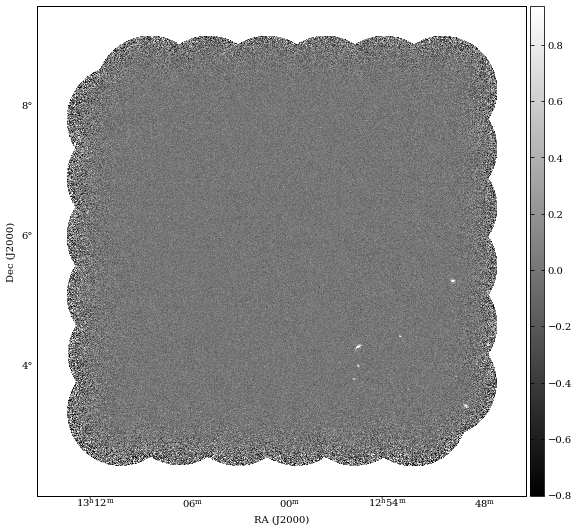

In [5]:
# Have a quick look at the cube

vel = [460, 1035]

cube_2 = cube.with_spectral_unit(u.km/u.s, velocity_convention='optical', rest_value=1.420405752 * u.GHz) 
subcube = cube_2.spectral_slab(460*u.km/u.s,1035*u.km/u.s)
subcube.moment0(axis=0).quicklook()

In [8]:
# save subcube

hdul = fits.HDUList([subcube.hdu])
hdul[0].header['BMIN']=0.5
hdul[0].header['BMAJ']=0.5
hdul[0].header['BPA']=0
hdul.writeto('{}{}_cut.fits'.format(input_dir, data_cube[:-5]), overwrite=True)


In [9]:
vel = [460, 1035]

In [16]:
# calculate moment 0 map
moment_0 = subcube.moment(order=0)

hdul = fits.HDUList([moment_0.hdu])
hdul[0].header['BMIN']=0.5
hdul[0].header['BMAJ']=0.5
hdul[0].header['BPA']=0
hdul.writeto('{}{}_cut_mom0.fits'.format(input_dir, data_cube[:-5]), overwrite=True)

INFO: Auto-setting vmax to  7.365e-01 [aplpy.core]


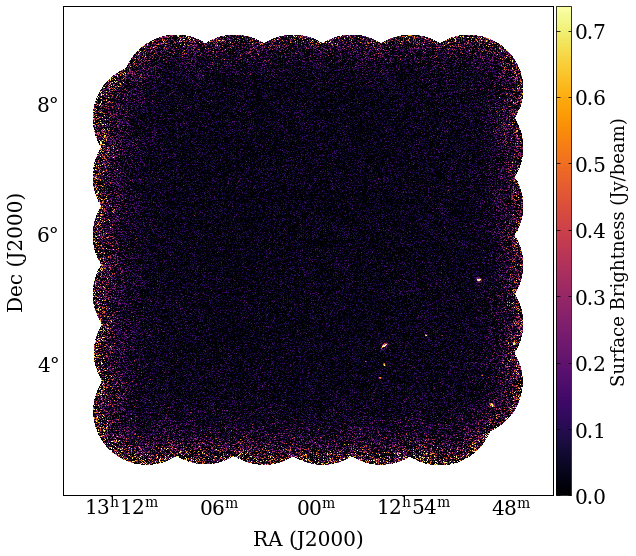

In [15]:
# plot moment 0 map

f = aplpy.FITSFigure(moment_0.hdu)  
f.show_colorscale(cmap='inferno', vmin=0)  
#f.recenter(153.94, -27.374, radius=4.)

f.add_colorbar()
f.colorbar.set_axis_label_text('Surface Brightness (Jy/beam)')
f.colorbar.set_axis_label_font(size=18)
f.colorbar.set_font(size=20, weight='medium', family='serif')

f.axis_labels.set_font(size=20, weight='medium', family='serif')
f.tick_labels.set_font(size=20, weight='medium', family='serif')
f.save('./plots/moment_0_maps/{}_moment_{}-{}.png'.format(data_cube[:-5], vel[0],vel[1]), dpi=200) 